In [1]:
from tomoSegmentPipeline.utils.common import read_array
from tomoSegmentPipeline.utils import setup

import numpy as np
import matplotlib.pyplot as plt
import random
import mrcfile
import pandas as pd
import torch
import os
from glob import glob
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import normalized_mutual_information as nmi
from sklearn.preprocessing import minmax_scale

PARENT_PATH = setup.PARENT_PATH
ISONET_PATH = os.path.join(PARENT_PATH, 'data/isoNet/')

def clip_values(tomo_data, low=0.005, high=0.995):
    aux = np.clip(tomo_data, np.quantile(tomo_data, low), np.quantile(tomo_data, high))
    return aux

# skimage will assume a range [-1.0, 1.0] for data_range when the input is floating-point
def minmax_scaler(X, feature_range=[-1, 1]):
    X_scaled = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_scaled * (max(feature_range) - min(feature_range)) + min(feature_range)
    
    return X_scaled

%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

In [18]:
import matplotlib as mpl

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [4]:
tomo_file_cryoCARE, label_file = setup.get_paths(['tomo32'], 'cryoCARE')
tomo_file_cryoCARE, label_file = tomo_file_cryoCARE[0], label_file[0]

tomo_file_rawCET, _ = setup.get_paths(['tomo32'], 'rawCET')
tomo_file_rawCET = tomo_file_rawCET[0]

tomo_file_isoNET, _ = setup.get_paths(['tomo32'], 'isoNET')
tomo_file_isoNET = tomo_file_isoNET[0]

tomo_file_cryoCARE_isoNET, _ = setup.get_paths(['tomo32'], 'cryoCARE+isoNET')
tomo_file_cryoCARE_isoNET = tomo_file_cryoCARE_isoNET[0]
                                       
tomo_fileList = [tomo_file_rawCET, tomo_file_cryoCARE, tomo_file_isoNET, tomo_file_cryoCARE_isoNET]
preprocessing_names = ['raw CryoET', 'CryoCARE', 'IsoNet', 'CryoCARE + IsoNet']

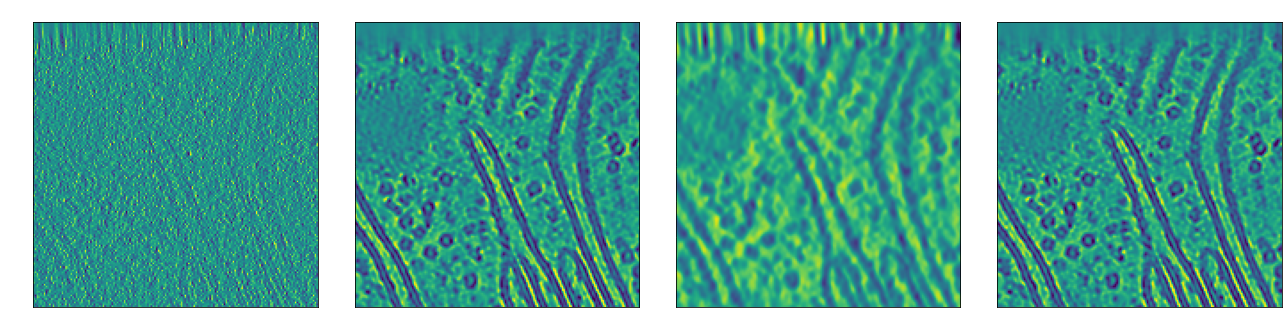

In [20]:
fig, ax = plt.subplots(1, 4, figsize=(18, 12))

for i in range(4):
    tomo_data = clip_values(read_array(tomo_fileList[i]), low=0.001, high=0.999)
    tomo_shape = tomo_data.shape
    ax[i].imshow(tomo_data[tomo_shape[0]//2])
    ax[i].set_title(preprocessing_names[i])

# fig.suptitle('Preprocessing techniques comparison', y=0.7)
plt.tight_layout()
plt.show()